In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle


In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
lb = LabelEncoder()

In [7]:
data['cut_encoder'] = lb.fit_transform(data['cut'])

In [8]:
data['color_encoder'] = lb.fit_transform(data['color'])

In [9]:
data['clarity_encoder'] = lb.fit_transform(data['clarity'])

In [10]:
data.drop(['cut','color','clarity'],axis = True)

,carat,depth,table,price,x,y,z,cut_encoder,color_encoder,clarity_encoder
0,0.23,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


In [11]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoder,color_encoder,clarity_encoder
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,3


<Axes: >

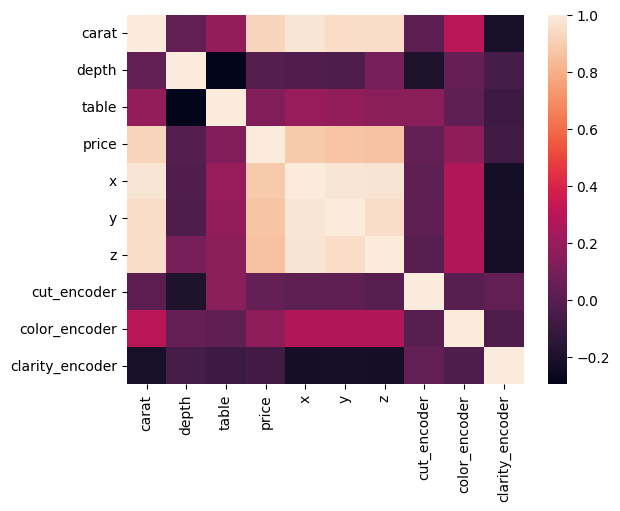

In [12]:
sns.heatmap(data.drop(['cut','color','clarity'],axis = True).corr())

In [13]:
data.drop(['cut','color','clarity'],axis = True).corr()

,carat,depth,table,price,x,y,z,cut_encoder,color_encoder,clarity_encoder
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.017124,0.291437,-0.214290
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.194249,0.047279,-0.053080
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.150327,0.026465,-0.088223
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.039860,0.172511,-0.071535
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.022342,0.270287,-0.225721
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.027572,0.263584,-0.217616
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.002037,0.268227,-0.224263
cut_encoder,0.017124,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037,1.000000,0.000304,0.028235
color_encoder,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,-0.027795
clarity_encoder,-0.214290,-0.053080,-0.088223,-0.071535,-0.225721,-0.217616,-0.224263,0.028235,-0.027795,1.000000


In [14]:
y = data['price']

In [15]:
x = data[['carat','depth','table','x','y','z','cut_encoder','color_encoder','clarity_encoder']]

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2529)

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
lr.score(x_test,y_test)

0.8780440250576974

In [20]:
lr.score(x_train,y_train)

0.8873050504840788

In [21]:
x = data[['carat','table','x','y','z','color_encoder']]

In [22]:
x

,carat,table,x,y,z,color_encoder
0,0.23,55.0,3.95,3.98,2.43,1
1,0.21,61.0,3.89,3.84,2.31,1
2,0.23,65.0,4.05,4.07,2.31,1
3,0.29,58.0,4.20,4.23,2.63,5
4,0.31,58.0,4.34,4.35,2.75,6
...,...,...,...,...,...,...
53935,0.72,57.0,5.75,5.76,3.50,0
53936,0.72,55.0,5.69,5.75,3.61,0
53937,0.70,60.0,5.66,5.68,3.56,0
53938,0.86,58.0,6.15,6.12,3.74,4


In [23]:
# Save the model to a file using pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr,model_file)